<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Общее-впечатление" data-toc-modified-id="Общее-впечатление-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><font color="orange">Общее впечатление</font></a></span></li><li><span><a href="#Общее-впечатление-(ревью-2)" data-toc-modified-id="Общее-впечатление-(ревью-2)-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span><font color="orange">Общее впечатление (ревью 2)</font></a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# Импортируем библиотек
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Считаем данные
data = pd.read_csv('/datasets/Churn.csv')
# Посмотрим на данные
display(data.head(5))
print('Типы данных в столбцах')
display(data.dtypes)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Типы данных в столбцах


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Выводы:** Столбец *RowNumber* дублирует индекс и не несет в себе полезной информации. Его не следует расматривать как признак для обчучения модели.

Столбец *Customerid* также не несет полезной информации для модели. Его значения в некотором роде дублируют индекс

Столбец *Surname*. Не думаю, что фамилия влияет на уход клиента, к тому же столбец имеет слишком много данных.

Столбец *Geography*. Можно оставить, так как на банки может влиять политическая ситуация

Остальные столбцы оставим в качестве признаков.

Не совсем понятно какой клиент считается активным (столбец *IsActiveMember*), возможно это определяется временем проведенным в приложениях или на сайтах банка или по количеству активных финансовых операций.

In [3]:
# Проверим на наличие пропусков
data.isnull().sum() / data.shape[0] * 100

RowNumber          0.00
CustomerId         0.00
Surname            0.00
CreditScore        0.00
Geography          0.00
Gender             0.00
Age                0.00
Tenure             9.09
Balance            0.00
NumOfProducts      0.00
HasCrCard          0.00
IsActiveMember     0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

Пропуски в столбце *Tenure* составляют 9%, что достаточно много. Возможно пропуски возникли случайно из-за сбоя во время записи данных в базу. Заменим пропуски на медиану.

In [4]:
# Заполним пропуски
data['Tenure'].fillna(data['Tenure'].median(), inplace=True)
# Проверка
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Уберем ненужные признаки
droped_cols = ['RowNumber', 'CustomerId', 'Surname']
data.drop(columns=droped_cols, inplace=True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Обработаем категориальные признаки

In [6]:
# Заменим строковые значения признаков на численные
data_ohe = pd.get_dummies(data, drop_first=True)
# Создадим таблицу с признаками и целевым признаком
features = data_ohe.drop(columns=['Exited'])
target = data_ohe['Exited']
#Проверим размерности
print(features.shape)
print(target.shape)

(10000, 11)
(10000,)


Обработаем количественные признаки, проведем их масштабирование 

In [7]:
# Разобьем исходный датасет на тренировочный, валидационный и тестовый
# Cначала розобьем датасет на тестовую (20%) и тренировочную выборки (80%)
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=12345
    ) 
# Дополнительно разделим тренировочную выборку на тренировочную (25% от 80%) и валидационную (75% от 80%)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345
    )
# Проверим разбиение
print(f"Размер тестовой выборки: {(features_test.shape[0] / data.shape[0]):.0%}")
print(f"Размер валидационной выборки: {(features_valid.shape[0] / data.shape[0]):.0%}")
print(f"Размер тренировочной выборки: {(features_train.shape[0] / data.shape[0]):.0%}")

Размер тестовой выборки: 20%
Размер валидационной выборки: 20%
Размер тренировочной выборки: 60%


In [8]:
# Нормализуем количественные признаки
scaler = StandardScaler()
# Запишем список столбцов с цисленными значениями, которые следует масштабировать
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',]
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи

In [9]:
# Оценим соотношения классов в целевой переменной
target_train.value_counts(normalize=True)

0    0.796833
1    0.203167
Name: Exited, dtype: float64

Видно, что только 20% людей ушли из банка. Тренировочная выборка сильно несбалансирована.

### Логистическая регрессия

Обучим модель логиcтической регрессии и посчитаем значения F1 и AUC_ROC метрик

In [10]:
LR = LogisticRegression(random_state=12345)
LR.fit(features_train, target_train)
predicted_valid = LR.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, LR.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(LR).__name__} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(LR).__name__} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели LogisticRegression на валидационной выборке: 0.30
AUC_ROC модели LogisticRegression на валидационной выборке: 0.77


### Дерево решений

Определим оптимальные параметры и обучим дерево решений

In [11]:
DT = DecisionTreeClassifier(random_state=12345)
# Найдем оптимальное значение глубины с помошью метода GridSearchCV
parameters = {'max_depth': range(1,20)}
DT = GridSearchCV(DT, parameters, scoring='f1', cv=5)
DT.fit(features_train, target_train)
predicted_valid = DT.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, DT.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели GridSearchCV с глубиной 7 на валидационной выборке: 0.56
AUC_ROC модели GridSearchCV с глубиной 7 на валидационной выборке: 0.82


### Случайный лес

Определим оптимальные параметры и обучим случайный лес

In [12]:
# RFC = RandomForestClassifier(random_state=12345)
# # Найдем оптимальное значение глубины и количества деревьев с помошью метода GridSearchCV
# parameters = {'max_depth':range(1,20), 'n_estimators':range(1,81,2)}
# RFC = GridSearchCV(RFC, parameters, scoring='f1', cv=5, verbose=10)
# RFC.fit(features_train, target_train)
# predicted_valid = RFC.predict(features_valid)
# f1 = f1_score(target_valid, predicted_valid)
# roc_auc = roc_auc_score(target_valid, RFC.predict_proba(features_valid)[:,1])
# print(f"F1-мера модели {type(RFC).__name__} c {RFC.best_params_['n_estimators']} деревьями с глубиной {RFC.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
# print(f"AUC_ROC модели {type(RFC).__name__} c {RFC.best_params_['n_estimators']} деревьями с глубиной {RFC.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

Код сверху закомментирован, так как подбор оптимальных значений достаточно длительный процесс. Чтобы не терять время снизу введена модель с оптимальными параметрами

In [13]:
RFC = RandomForestClassifier(random_state=12345, n_estimators=65, max_depth=14)
RFC.fit(features_train, target_train)
predicted_valid = RFC.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, RFC.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(RFC).__name__} c 65 деревьями с глубиной 14 на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(RFC).__name__} c  65 деревьями с глубиной 14 на валидационной выборке: {roc_auc:.2f}")

F1-мера модели RandomForestClassifier c 65 деревьями с глубиной 14 на валидационной выборке: 0.56
AUC_ROC модели RandomForestClassifier c  65 деревьями с глубиной 14 на валидационной выборке: 0.84


**Выводы:** Ни одна модель не смогла достичь требуемого значения метрики. Для случайного леса и дерева решений значения F1 метрики оказались одинаковыми. Во всех случаях метрика AUC_ROC была больше 0,5, что свидетельствует о том, что модели отличаются от случайной

## Борьба с дисбалансом

Переобучим модели, уравновесив классы в целевом признаке. Для этого присвоим каждому классу вес в соответсвии с их долями в тренировочной выборке

### Взвешивание классов

#### Логистическая регрессия

In [14]:
LR = LogisticRegression(random_state=12345, class_weight='balanced')
LR.fit(features_train, target_train)
predicted_valid = LR.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, LR.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(LR).__name__} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(LR).__name__} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели LogisticRegression на валидационной выборке: 0.47
AUC_ROC модели LogisticRegression на валидационной выборке: 0.77


#### Дерево решений

In [15]:
DT = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
# Найдем оптимальное значение глубины с помошью метода GridSearchCV
parameters = {'max_depth': range(1,20)}
DT = GridSearchCV(DT, parameters, scoring='f1', cv=5)
DT.fit(features_train, target_train)
predicted_valid = DT.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, DT.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели GridSearchCV с глубиной 6 на валидационной выборке: 0.56
AUC_ROC модели GridSearchCV с глубиной 6 на валидационной выборке: 0.81


#### Случайный лес

In [16]:
# RFC_B = RandomForestClassifier(random_state=12345, class_weight='balanced')
# # Найдем оптимальное значение глубины и количества деревьев с помошью метода GridSearchCV
# parameters = {'max_depth':range(1,20), 'n_estimators':range(1,81,2)}
# RFC_B = GridSearchCV(RFC_B, parameters, scoring='f1', cv=5, verbose=10)
# RFC_B.fit(features_train, target_train)
# predicted_valid = RFC_B.predict(features_valid)
# f1 = f1_score(target_valid, predicted_valid)
# roc_auc = roc_auc_score(target_valid, RFC_B.predict_proba(features_valid)[:,1])
# print(f"F1-мера модели {type(RFC_B).__name__} c {RFC_B.best_params_['n_estimators']} деревьями с глубиной {RFC_B.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
# print(f"AUC_ROC модели {type(RFC_B).__name__} c {RFC_B.best_params_['n_estimators']} деревьями с глубиной {RFC_B.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

Код сверху закомментирован, так как подбор оптимальных значений достаточно длительный процесс. Чтобы не терять время, снизу введена модель с оптимальными параметрами

In [17]:
RFC_B = RandomForestClassifier(random_state=12345, n_estimators=65, max_depth=9, class_weight='balanced')
RFC_B.fit(features_train, target_train)
predicted_valid = RFC_B.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, RFC.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(RFC_B).__name__} c {RFC_B.get_params()['n_estimators']} деревьями с глубиной {RFC_B.get_params()['max_depth']} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(RFC_B).__name__} c {RFC_B.get_params()['n_estimators']} деревьями с глубиной {RFC_B.get_params()['max_depth']} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели RandomForestClassifier c 65 деревьями с глубиной 9 на валидационной выборке: 0.59
AUC_ROC модели RandomForestClassifier c 65 деревьями с глубиной 9 на валидационной выборке: 0.84


**Выводы:** При балансировке классов значения метрик сильно улучшились для логистической регрессии и слабо увеличились для случайного леса и дерева решений. Только модель случайного леса смогла достигнуть требуемого уровня метрики.

### Увеличение выборки

Посмотрим на дисбаланс классов.

In [18]:
target_train.value_counts()

0    4781
1    1219
Name: Exited, dtype: int64

Увеличим количество объектов 1го класса в 4 раза, чтобы выборка стала сбалансированной

In [19]:
repeat = 4
features_ones = features_train[target_train == 1]
features_zeros = features_train[target_train == 0]
target_ones = target_train[target_train == 1]
target_zeros = target_train[target_train == 0]
features_train_up = pd.concat([features_zeros] + [features_ones] * repeat)
target_train_up = pd.concat([target_zeros] + [target_ones] * repeat) 
features_train_up, target_train_up = shuffle(features_train_up, target_train_up, random_state=12345)
# Проверка
target_train_up.value_counts()

1    4876
0    4781
Name: Exited, dtype: int64

#### Логистическая регрессия

In [20]:
LR = LogisticRegression(random_state=12345)
LR.fit(features_train_up, target_train_up)
predicted_valid = LR.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, LR.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(LR).__name__} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(LR).__name__} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели LogisticRegression на валидационной выборке: 0.48
AUC_ROC модели LogisticRegression на валидационной выборке: 0.77


#### Дерево решений

In [21]:
# DT = DecisionTreeClassifier(random_state=12345)
# # Найдем оптимальное значение глубины с помошью метода GridSearchCV
# parameters = {'max_depth': range(1,20)}
# DT = GridSearchCV(DT, parameters, scoring='f1', cv=5)
# DT.fit(features_train_up, target_train_up)
# predicted_valid = DT.predict(features_valid)
# f1 = f1_score(target_valid, predicted_valid)
# roc_auc = roc_auc_score(target_valid, DT.predict_proba(features_valid)[:,1])
# print(f"F1-мера модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
# print(f"AUC_ROC модели {type(DT).__name__} с глубиной {DT.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

In [22]:
# Создадим модель класа DecisionTree и обучим ее, меняя гиперпараметры
accuracy = []
best_f1 = 0
max_depth = 0
best_DTC = None
n = 20
for depth in range(1,n):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train_up, target_train_up)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    accuracy.append(f1) 
    if f1 > best_f1:
        best_DTC = model
        best_f1 = f1
        max_depth = depth
roc_auc = roc_auc_score(target_valid, best_DTC.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(model).__name__} с глубиной {max_depth} на валидационной выборке: {best_f1:.2f}")
print(f"AUC_ROC модели {type(best_DTC).__name__} с глубиной {max_depth} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели DecisionTreeClassifier с глубиной 6 на валидационной выборке: 0.56
AUC_ROC модели DecisionTreeClassifier с глубиной 6 на валидационной выборке: 0.81


#### Случайный лес

In [23]:
# RFC_UP = RandomForestClassifier(random_state=12345)
# # Найдем оптимальное значение глубины и количества деревьев с помошью метода GridSearchCV
# parameters = {'max_depth':range(1,20), 'n_estimators':range(1,81,2)}
# RFC_UP = GridSearchCV(RFC_UP, parameters, scoring='f1', cv=5, verbose=10)
# RFC_UP.fit(features_train_up, target_train_up)
# predicted_valid = RFC_UP.predict(features_valid)
# f1 = f1_score(target_valid, predicted_valid)
# roc_auc = roc_auc_score(target_valid, RFC_UP.predict_proba(features_valid)[:,1])
# print(f"F1-мера модели {type(RFC_UP).__name__} c {RFC_UP.best_params_['n_estimators']} деревьями с глубиной {RFC_UP.best_params_['max_depth']} на валидационной выборке: {f1:.2f}")
# print(f"AUC_ROC модели {type(RFC_UP).__name__} c {RFC_UP.best_params_['n_estimators']} деревьями с глубиной {RFC_UP.best_params_['max_depth']} на валидационной выборке: {roc_auc:.2f}")

Код сверху закомментирован, так как подбор оптимальных значений достаточно длительный процесс. Чтобы не терять время, снизу введена модель с оптимальными параметрами

In [24]:
RFC_UP = RandomForestClassifier(random_state=12345, n_estimators=77, max_depth=19)
RFC_UP.fit(features_train_up, target_train_up)
predicted_valid = RFC_UP.predict(features_valid)
f1 = f1_score(target_valid, predicted_valid)
roc_auc = roc_auc_score(target_valid, RFC.predict_proba(features_valid)[:,1])
print(f"F1-мера модели {type(RFC_UP).__name__} c {RFC_UP.get_params()['n_estimators']} деревьями с глубиной {RFC_UP.get_params()['max_depth']} на валидационной выборке: {f1:.2f}")
print(f"AUC_ROC модели {type(RFC_UP).__name__} c  {RFC_UP.get_params()['n_estimators']} деревьями с глубиной {RFC_UP.get_params()['max_depth']} на валидационной выборке: {roc_auc:.2f}")

F1-мера модели RandomForestClassifier c 77 деревьями с глубиной 19 на валидационной выборке: 0.58
AUC_ROC модели RandomForestClassifier c  77 деревьями с глубиной 19 на валидационной выборке: 0.84


**Выводы:** Увеличение выборки привело к увеличению значений F1 метрики для логистической регрессии и случайного леса. В случае с деревом решений метрика, наоборот, уменьшилась. Аналогичная ситуация с метрикой AUC_ROC. Возможно, я поставил слишком большое число повторений объетов 1го класса и дерево решений не смогло уловить более глубокие зависимости между признаками и целевым признаком

## Тестирование модели

Для финального тестирования выберем модель случайного леса с учетом взешивания классов, так как эта модель создала меньше деревьев и с меньшей глубиной по сравнению с моделью случайного леса обученной на увеличенной выборке. При этом, значения метрик оказались близкими.

In [25]:
predicted_test = RFC_B.predict(features_test)
f1 = f1_score(target_test, predicted_test)
print(f"F1-мера модели {type(RFC_B).__name__} c {RFC_B.get_params()['n_estimators']} деревьями с глубиной {RFC_B.get_params()['max_depth']} на валидационной выборке: {f1:.2f}")

F1-мера модели RandomForestClassifier c 65 деревьями с глубиной 9 на валидационной выборке: 0.64


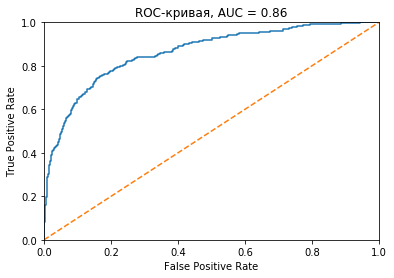

In [26]:
# Постоим ROC-кривую
predicted_probas = RFC_B.predict_proba(features_test)
roc_auc = roc_auc_score(target_test, predicted_probas[:,1])
fpr, tpr, thresholds = roc_curve(target_test, predicted_probas[:,1])
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC-кривая, AUC = ' + str(f'{roc_auc:.2f}'))
plt.show()

## Выводы

В рамках данного проекта были расмотрены различные модели и способы борьбы с дисбалансом. В качестве итоговой модели был выбран случайный лес с 65 деревьями глубиной 9. 

Для борьбы с дисбалансом лучше подошло взвешивание классов во время обучения модели, а не увеличение тренировочной выборки. Модели случайного леса, которая обучалачь на увеличенной выборке, потребовалось потребовалось больше деревьев с увеличенной глубиной. Возможно, это было вызвано слишком большим коэффициентом повторения объектов меньшего класса и модель не смогла сразу выявить основные закономерности между признаками и целевым признаком.

Во всех случаях метрика AUC_ROC была больше 0,5. Следовательно, все модели значительно отличались от случайной.

Достигаемый уровень F1 метрики составил на тестовой выборке 0,64, что позволяет использовать данную модель для прогнозированния оттока клиентов.